In [1]:
# Step 1: Load and Explore Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check value counts of the target variable 'Outcome'
# Check value counts of the target variable 'diabetes'
print("\nDiabetes distribution:")
print(df['diabetes'].value_counts())


First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Summary statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Identify categorical and numerical columns
cat_features = ['gender', 'smoking_history']
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Split into train/test first to avoid data leakage during preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Fit-transform training data, transform test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Handle class imbalance on training data with SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"Original training set size: {X_train.shape[0]}, Positive cases: {sum(y_train)}")
print(f"Resampled training set size: {X_train_resampled.shape[0]}, Positive cases: {sum(y_train_resampled)}")


Original training set size: 80000, Positive cases: 6800
Resampled training set size: 146400, Positive cases: 73200


<ipython-input-3-4c364a4adb99>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No Diabetes', 'Diabetes'])
<ipython-input-3-4c364a4adb99>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No Diabetes', 'Diabetes'])


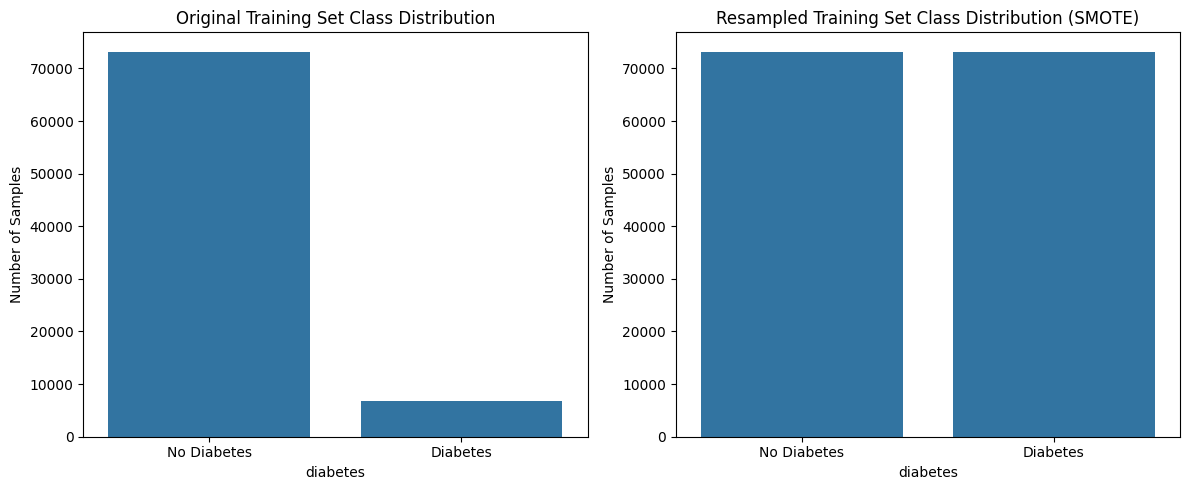

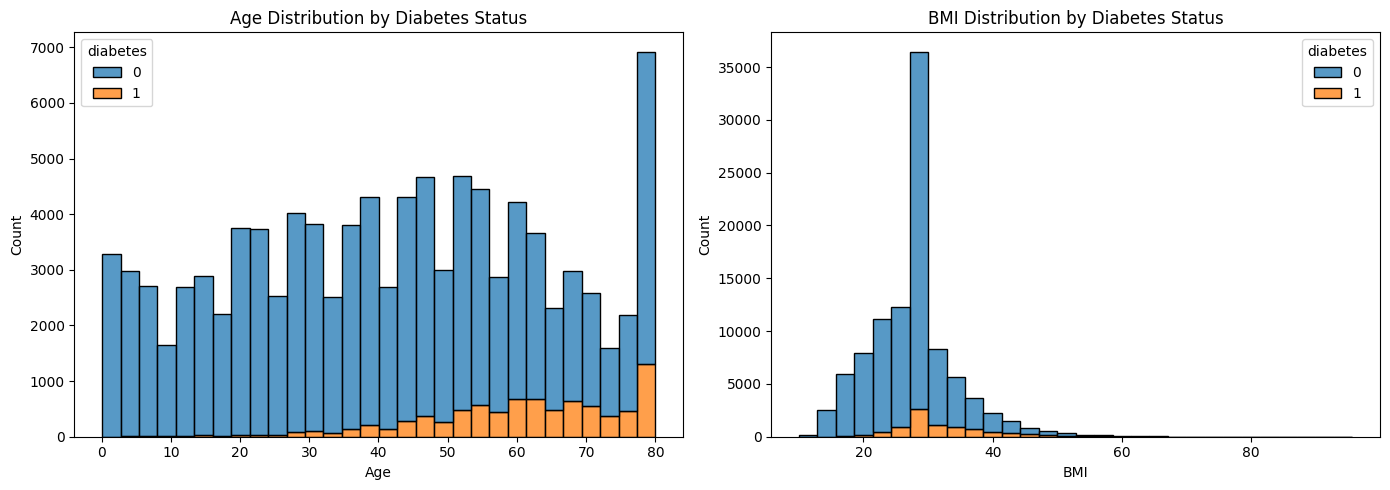

<ipython-input-3-4c364a4adb99>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No Diabetes', 'Diabetes'])
<ipython-input-3-4c364a4adb99>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No Diabetes', 'Diabetes'])


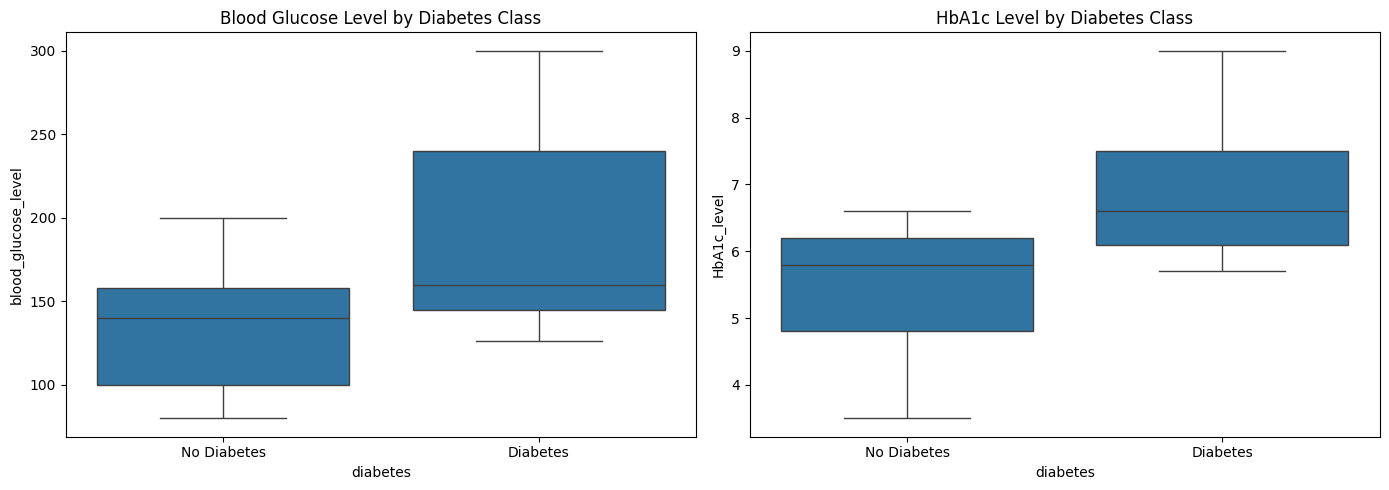

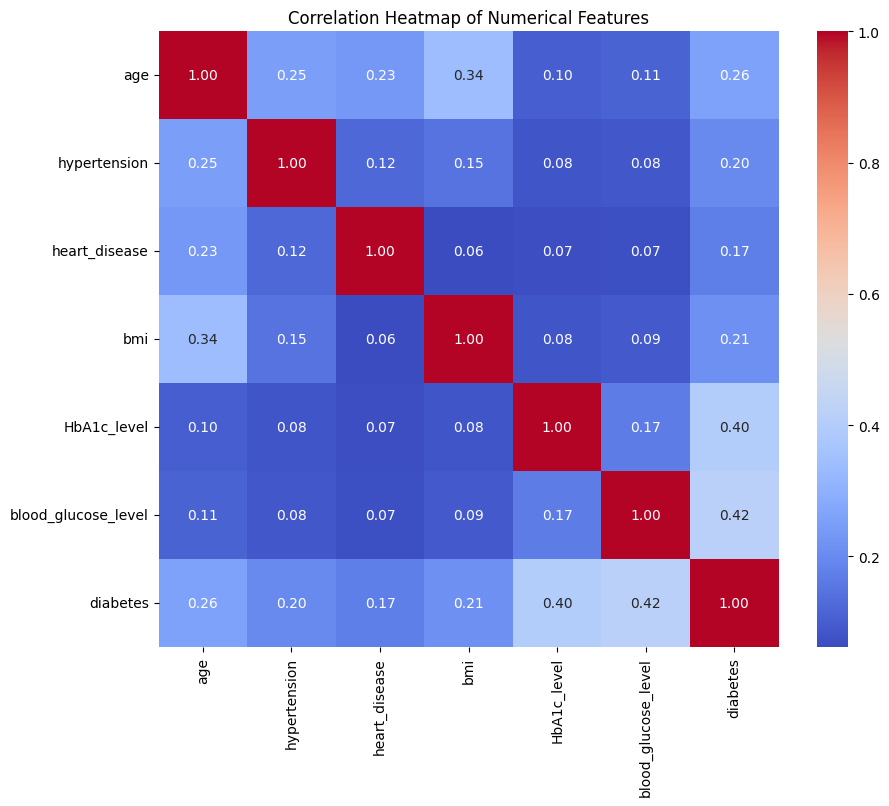

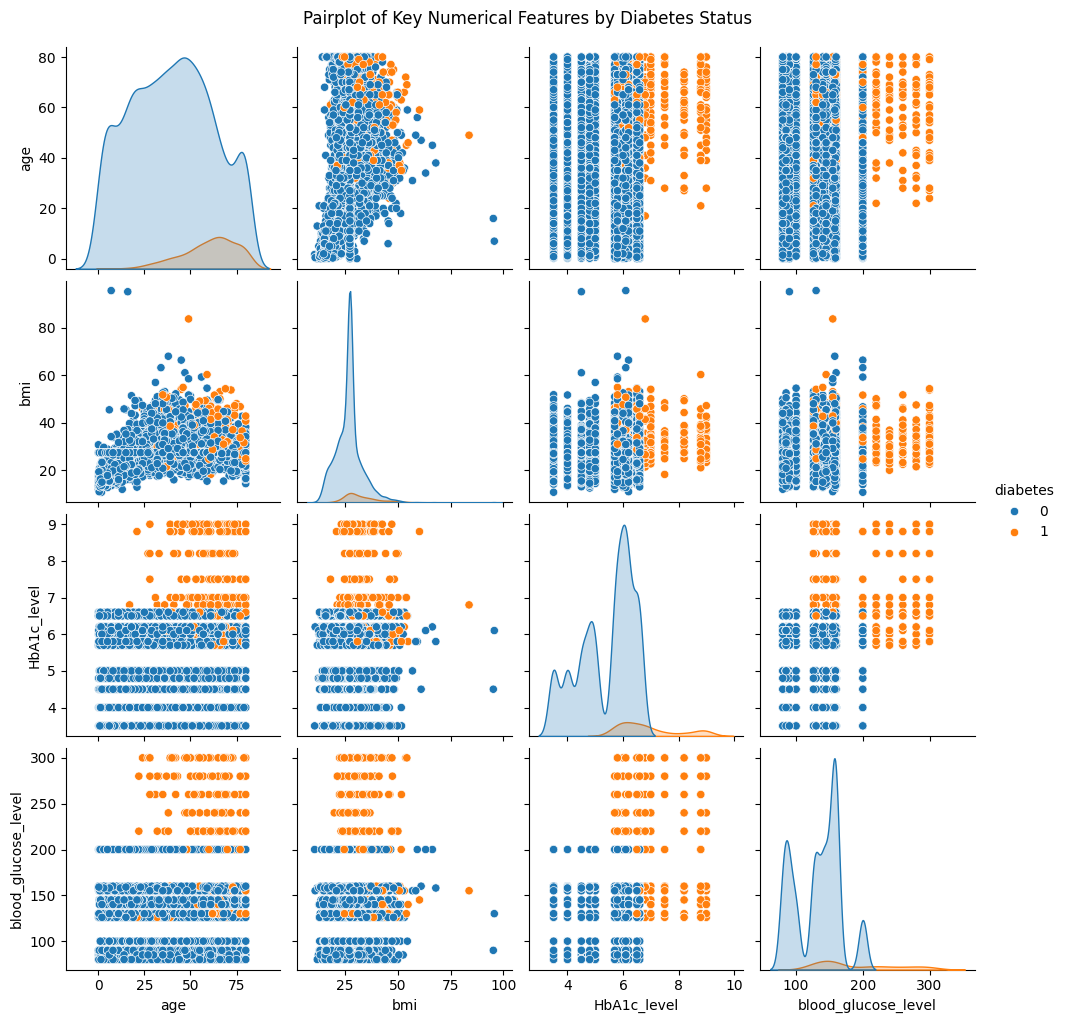

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Bar plot: Class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original training distribution
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Original Training Set Class Distribution')
ax[0].set_xticklabels(['No Diabetes', 'Diabetes'])
ax[0].set_ylabel('Number of Samples')

# Resampled training distribution
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title('Resampled Training Set Class Distribution (SMOTE)')
ax[1].set_xticklabels(['No Diabetes', 'Diabetes'])
ax[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

# 2. Histograms: Distribution of Age and BMI by diabetes status in the original dataset
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=30, ax=ax[0])
ax[0].set_title('Age Distribution by Diabetes Status')
ax[0].set_xlabel('Age')

sns.histplot(data=df, x='bmi', hue='diabetes', multiple='stack', bins=30, ax=ax[1])
ax[1].set_title('BMI Distribution by Diabetes Status')
ax[1].set_xlabel('BMI')

plt.tight_layout()
plt.show()

# 3. Box plots: Comparing blood_glucose_level and HbA1c_level by class
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=ax[0])
ax[0].set_title('Blood Glucose Level by Diabetes Class')
ax[0].set_xticklabels(['No Diabetes', 'Diabetes'])

sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=ax[1])
ax[1].set_title('HbA1c Level by Diabetes Class')
ax[1].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

# 4. Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
numeric_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Pairplot for numerical features colored by diabetes class (subset for speed)
sampled_df = df.sample(5000, random_state=42)  # sample to speed up plotting
sns.pairplot(sampled_df, vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes', diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Features by Diabetes Status', y=1.02)
plt.show()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Summary of results
print("\n\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")



Training and evaluating: Logistic Regression
              precision    recall  f1-score   support

 No Diabetes       0.99      0.89      0.94     18300
    Diabetes       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000


Training and evaluating: Random Forest
              precision    recall  f1-score   support

 No Diabetes       0.98      0.98      0.98     18300
    Diabetes       0.74      0.75      0.75      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000


Training and evaluating: SVM
              precision    recall  f1-score   support

 No Diabetes       0.99      0.89      0.94     18300
    Diabetes       0.44      0.92      0.60      1700

    accuracy                           0.89     20000
   macro avg

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:42:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

 No Diabetes       0.97      0.99      0.98     18300
    Diabetes       0.91      0.71      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



Model Performance Summary:

Logistic Regression:
  Accuracy: 0.8892
  Precision: 0.4272
  Recall: 0.8912
  F1-Score: 0.5776
  ROC-AUC: 0.9630

Random Forest:
  Accuracy: 0.9564
  Precision: 0.7394
  Recall: 0.7512
  F1-Score: 0.7453
  ROC-AUC: 0.9635

SVM:
  Accuracy: 0.8943
  Precision: 0.4415
  Recall: 0.9194
  F1-Score: 0.5966
  ROC-AUC: 0.9692

XGBoost:
  Accuracy: 0.9694
  Precision: 0.9121
  Recall: 0.7082
  F1-Score: 0.7974
  ROC-AUC: 0.9764


Logistic Regression ROC-AUC: 0.9630
Random Forest ROC-AUC: 0.9635
SVM ROC-AUC: 0.9692
XGBoost ROC-AUC: 0.9764


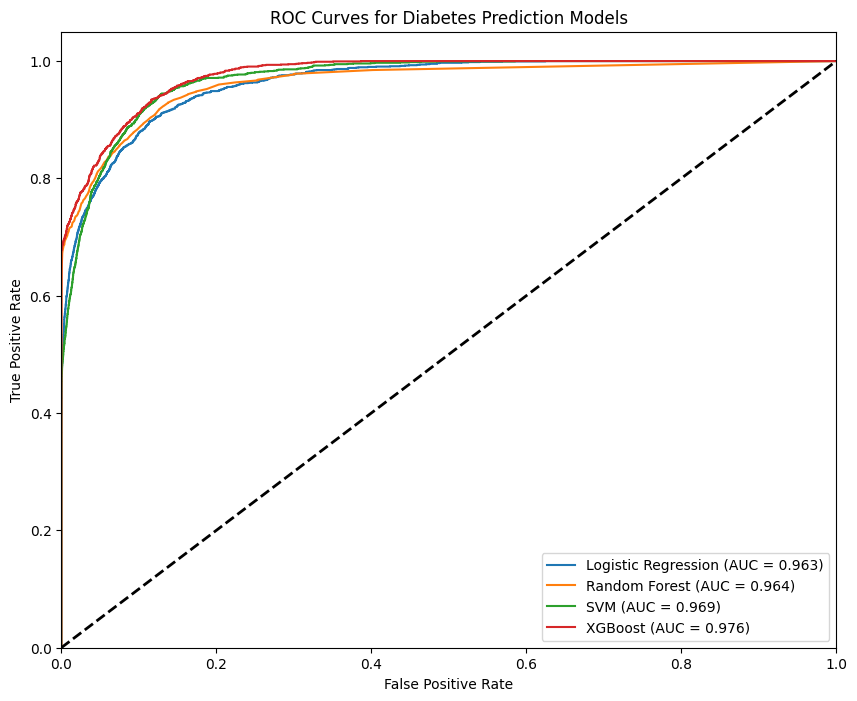

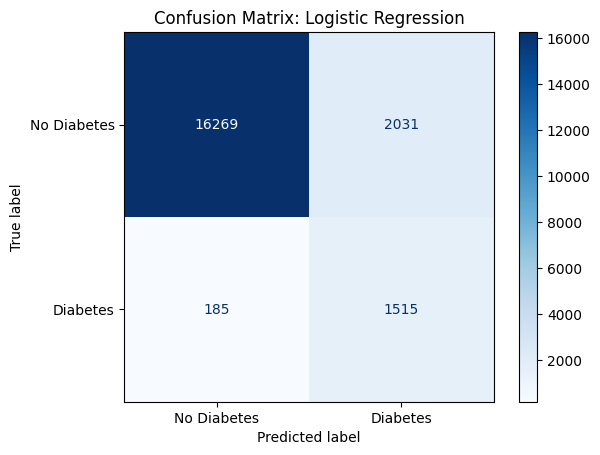

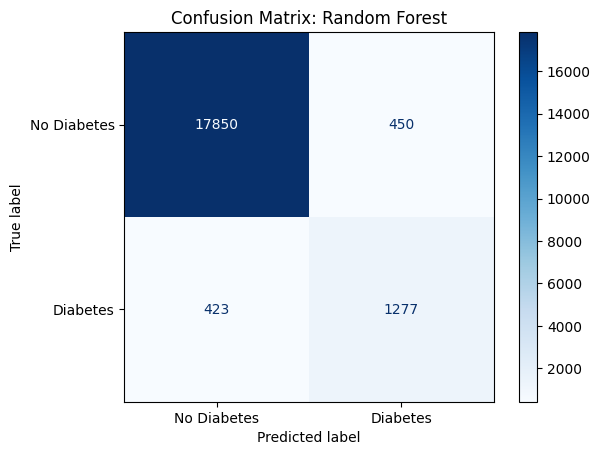

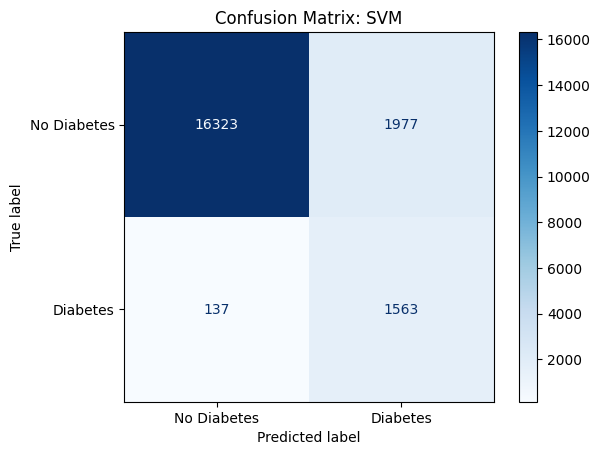

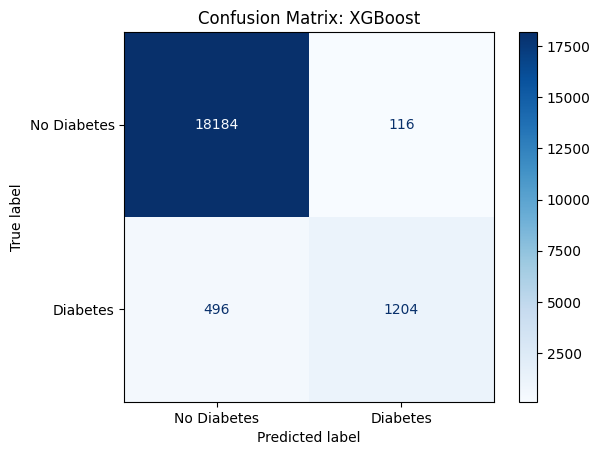

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"{name} ROC-AUC: {roc_auc:.4f}")

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Prediction Models')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
